In [1]:
import sys
import warnings
warnings.filterwarnings('ignore')
sys.path.append("..")

from models.data_processor import DataProcessor
from models.linear_reg.simple_linear_regressor import SimpleLinearRegressor
from models.linear_reg.linear_regressor import LinearRegressor
from models.grad_boost.grad_booster import GradBooster
from models.exp_smoothing.smoothing import SmoothingPredictor
from time import time 

### Preprocess data

In [2]:
processor = DataProcessor()
data, feature_list = processor.data, processor.feature_list
s = 5
fh = 1

X, y = processor.preprocess(s, fh, use_neighbours=False)
X_train, X_test, y_train, y_test = processor.train_val_test_split(X, y, split_type=2) # train 2019; test 2021

In [3]:
# because smoothing is slow
X_train, y_train = X_train[-100:], y_train[-100:]
X_test, y_test = X_test[:5], y_test[:5]

### Fit and evaluate models

In [4]:
reg_classes = [
    SmoothingPredictor,
    SimpleLinearRegressor,
    LinearRegressor,
    GradBooster
]

default_types = [
    "simple",
    "ridge",
    "ridge",
    "lgb"
]

for reg_class, default_type in zip(reg_classes, default_types):
    print(reg_class.__name__, default_type)
    start = time()
    regressor = reg_class(X.shape, fh, feature_list, default_type)
    regressor.train(X_train, y_train)
    y_hat = regressor.predict_and_evaluate(X_test, y_test, plot=False)
    end = time()
    print(f'\n {reg_class.__name__} {end-start} [s]')
    print("\n======================================\n")

SmoothingPredictor simple
Not needed
Evaluation metrics for entire test set:
t2m => RMSE: 2.16292089395178;  MAE: 1.7274356025187174; SE: 0.07402459976320964
sp => RMSE: 1.2175802199982524;  MAE: 0.9244913004684453; SE: 0.263532377152643
tcc => RMSE: 0.2856489563433588;  MAE: 0.20043422485987344; SE: 0.004236490717694596
u10 => RMSE: 1.8479407821240457;  MAE: 1.3435474150276183; SE: 0.029764515627639536
v10 => RMSE: 1.5055471569666505;  MAE: 1.009944107767741; SE: 0.0335594644905463
tp => RMSE: 0.00038913888107631203;  MAE: 0.00014440325558185576; SE: 3.1680826559693835e-06

 SmoothingPredictor 104.43634247779846 [s]


SimpleLinearRegressor ridge
Evaluation metrics for entire test set:
t2m => RMSE: 1.5709376206998336;  MAE: 1.2432128720172817; SE: 0.07402459976320964
sp => RMSE: 1.1200942534123883;  MAE: 0.891785255979817; SE: 0.263532377152643
tcc => RMSE: 0.2905763316732946;  MAE: 0.2345399394420392; SE: 0.004236490717694596
u10 => RMSE: 1.7698137895322466;  MAE: 1.323836636675132; S

t2m => RMSE:  1.6568197586691926; MAE: 1.3232178930354157; SE: 0.051443270209423145
sp => RMSE:  0.8075560721428642; MAE: 0.5817377584614474; SE: 0.5638486962507591
tcc => RMSE:  0.28778091721017585; MAE: 0.24579780878039856; SE: 0.006088579482528727
u10 => RMSE:  1.1419670948353937; MAE: 0.8941568933395629; SE: 0.048512280730662556
v10 => RMSE:  0.9014354751226752; MAE: 0.6840747852076126; SE: 0.019162182113431486
tp => RMSE:  0.00011638843809376135; MAE: 7.662571680774282e-05; SE: 6.833329125668382e-07


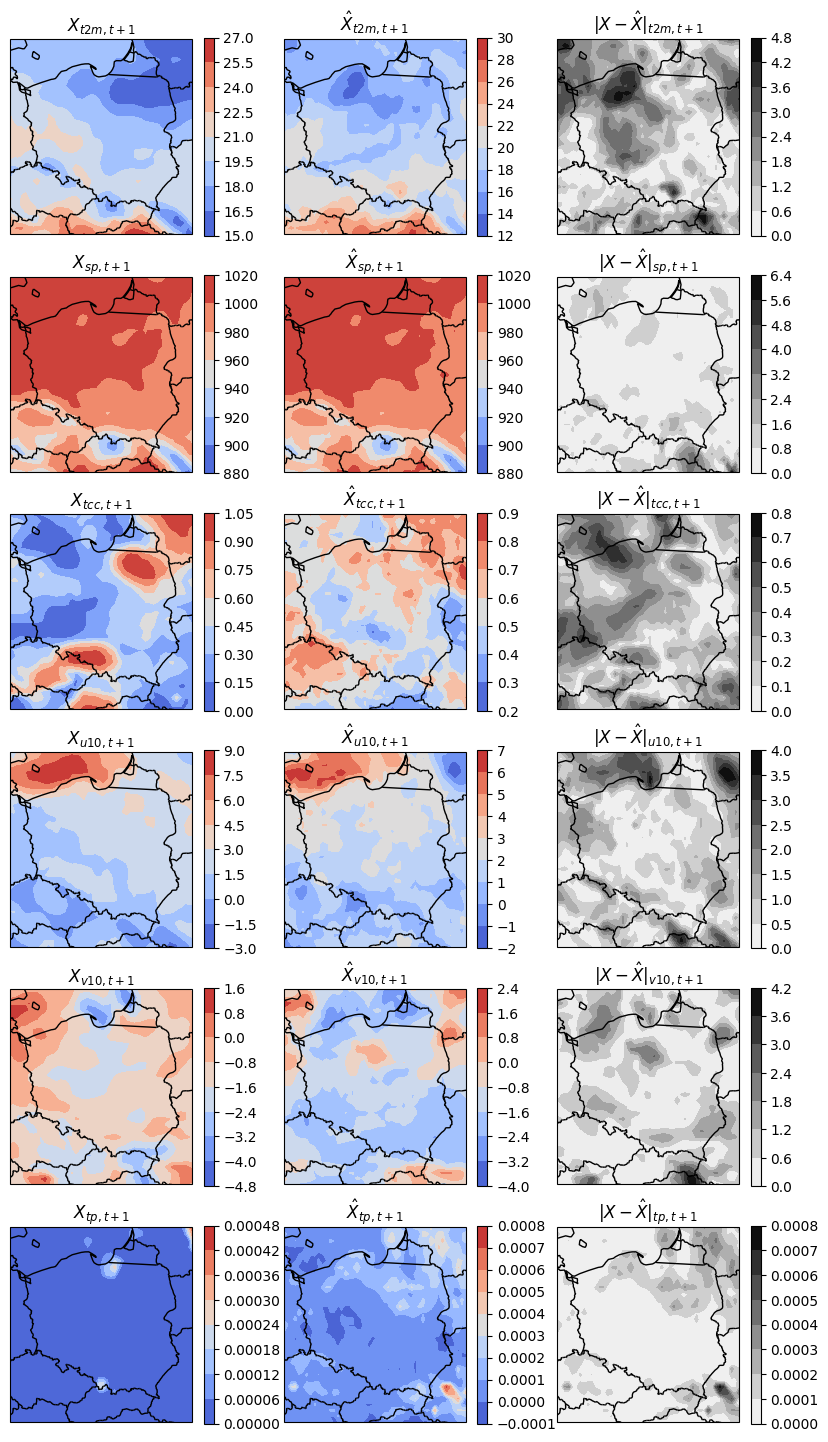

In [5]:
regressor.plot_predictions(y_hat, y_test, 1, pretty=True)